# Test

In [1]:

from model import cc, Autoencoder
from preprocess.tacotron.norm_utils import spectrogram2wav, get_spectrograms

import warnings, torch
import numpy as np
from scipy.io.wavfile import write

warnings.filterwarnings('ignore')


In [2]:
def result(P_s, P_t, _id):
    global spectrogram, output
    _, spectrogram = get_spectrograms(f'/media/D/DLHLP/hw2/Corpus/wav48/p{P_s}/p{P_s}_{_id}.wav')

    _input = np.expand_dims(spectrogram, axis=0)
    _input = torch.tensor(_input).permute(0,2,1).cuda()
    _person = torch.tensor([P_t-1]).cuda()

    output = autoencoder(_input, _person)

    output = output.squeeze(axis=0).transpose(1,0).cpu().detach().numpy()

    wav_data = spectrogram2wav(output)
    write(f'result/{P_s}_{P_t}_{_id}.wav', 16000, data=wav_data)


autoencoder = cc(Autoencoder())
autoencoder.load_state_dict(torch.load('trained_model/epoch_7_loss_0.0038_autoencoder_.pt')['state_dict'])

testing = [{'P_s':2, 'P_t':1, '_id':338},
           {'P_s':2, 'P_t':2, '_id':338},
           {'P_s':1, 'P_t':2, '_id':334},
           {'P_s':1, 'P_t':1, '_id':334}]

for t in testing:
    result(t['P_s'], t['P_t'], t['_id'])
    

In [3]:
#spectrogram.shape, output.shape

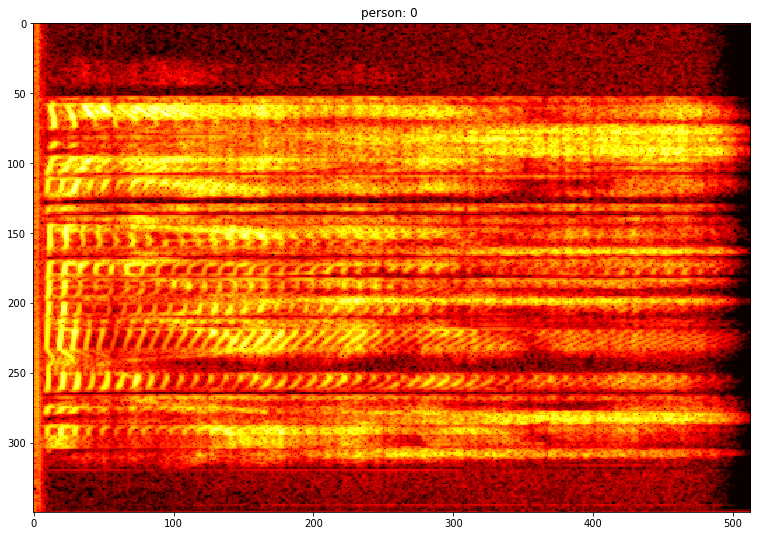

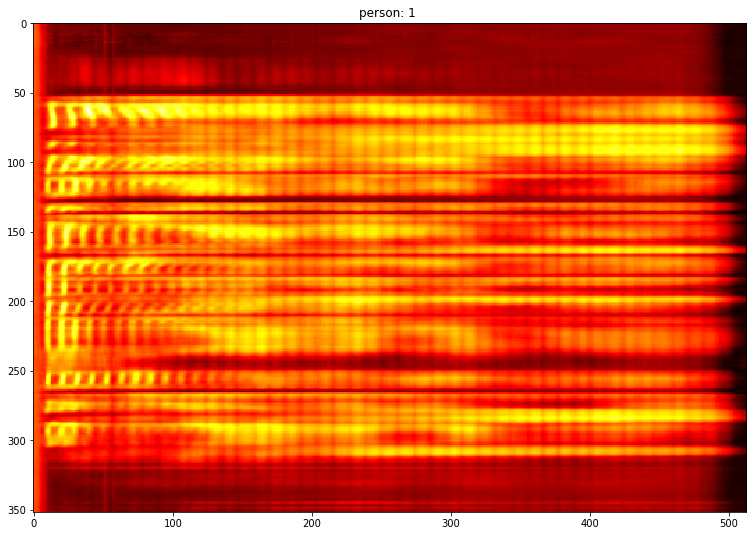

In [4]:

import matplotlib.pyplot as plt
%matplotlib inline
    
plt.figure(figsize=(16,9))
plt.title(f"person: 0 ")
plt.imshow(spectrogram, cmap="hot")
plt.show()

plt.figure(figsize=(16,9))
plt.title(f"person: 1 ")
plt.imshow(output, cmap="hot")
plt.show()


# Interpolate

In [5]:
from model import cc, Autoencoder
from preprocess.tacotron.norm_utils import spectrogram2wav, get_spectrograms

import warnings, torch
import numpy as np
from scipy.io.wavfile import write

warnings.filterwarnings('ignore')


In [6]:
def interpolate(P_s, P_t, _id):
    _, spectrogram = get_spectrograms(f'/media/D/DLHLP/hw2/Corpus/wav48/p{P_s}/p{P_s}_{_id}.wav')

    _input = np.expand_dims(spectrogram, axis=0)
    _input = torch.tensor(_input).permute(0,2,1).cuda()

    p1 = torch.tensor([0]).cuda()
    p2 = torch.tensor([1]).cuda()

    output = autoencoder.interpolate(_input, p1, p2)

    output = output.squeeze(axis=0).transpose(1,0).cpu().detach().numpy()

    wav_data = spectrogram2wav(output)
    write(f'result/{P_s}_{P_t}_{_id}_interpolate.wav', 16000, data=wav_data)
    

#autoencoder = cc(Autoencoder())
#autoencoder.load_state_dict(torch.load('trained_model/epoch_5_loss_0.0034_gen_.pt')['state_dict'])

testing = [{'P_s':2, 'P_t':1, '_id':338},
           {'P_s':1, 'P_t':2, '_id':334}]
for t in testing:
    interpolate(t['P_s'], t['P_t'], t['_id'])
    


In [7]:
torch.__version__

'1.4.0'